## Sounddevice

python-sounddevice allows you to record audio from your microphone and store it as a NumPy array.

This is a handy datatype for sound processing that can be converted to WAV format for storage using the scipy.io.wavfile module.

In [67]:
import sounddevice as sd
from scipy.io.wavfile import write, read
from scipy.signal import csd, convolve as conv, welch as psd, coherence
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import correlate
from IPython.display import Audio
%matplotlib inline




Methods for generating channel response

1. Generate a sound
2. Pass this sound through a simulated channel (response found by convolution)
3. Compare the PSD of channel output and the CSD of original sound and channel output in order to find H
4. Perform iFFT on H to find h

$$
    r_{XY}(\tau) = h(\tau) \star r_{XX}(\tau) \quad \rightarrow^{\textrm{F.T.}} \quad S_{XY}(\omega) = H(\omega) S_X(\omega)
$$



### 0. Set all the paramaters

In [68]:
fs = 44100  # Sample rate
seconds = 3  # Duration of sample .wav
L = 1000 #channel response length
N = 1000 #block length (of OFDM?)
W = 1000000 #bandwidth (of OFDM?)
impulse_magnitude=1500

thresh_divider=20 #for triming the received audio

In [69]:
# a useful function to be called later
def plot(x,title='',y=[]):
    fig, ax = plt.subplots()
    if len(y)==len(x):
        ax.plot(y,x)
    else:
        ax.plot(x)
    ax.set_title(title)

# Generating part:

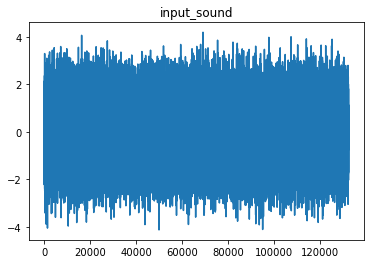

In [70]:


# Mean, Standard Deviation, num_samples
# input_sound = np.array([0]*fs*seconds) 
# input_sound[0]=1
input_sound = np.random.normal(0,1, fs*seconds)


plot(input_sound,'input_sound')

# Save the numpy as wav audio file
write('input_sound.wav', fs, input_sound)

# Simulating channel

Use a simulated channel response (the same as the one for week1 challenge) so that our codes can be tested to see if they work

30


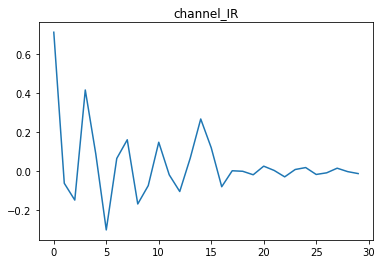

In [71]:
channel_IR = np.genfromtxt('simulating_channel.csv',delimiter=',')
plot(channel_IR,'channel_IR')
print(len(channel_IR))

/Users/tracychen/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


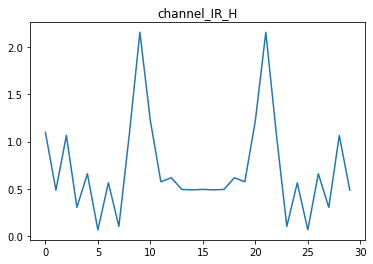

In [72]:
# for reference
channel_IR_H = np.fft.fft(channel_IR)
plot(channel_IR_H,'channel_IR_H')

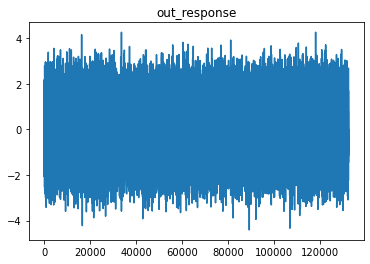

In [73]:
out_response = conv(channel_IR,input_sound)
plot(out_response,'out_response')

# Analysing the channel output

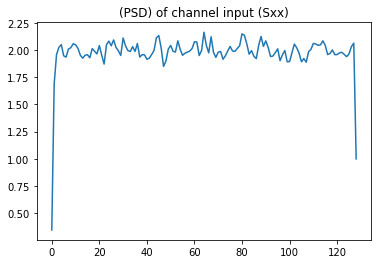

In [74]:
len_seg=2000
fxx,sxx=csd(input_sound,input_sound)
plot(sxx,'(PSD) of channel input (Sxx)')

In [75]:

out_response=out_response[29:]
print(len(input_sound))
print(len(out_response))

132300
132300


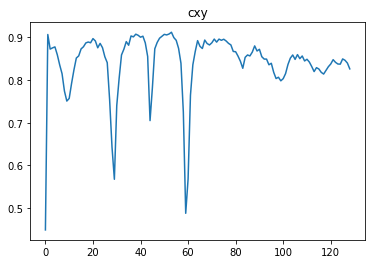

In [76]:
f,cxy=coherence(input_sound,out_response)
plot(cxy,'cxy')

/Users/tracychen/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


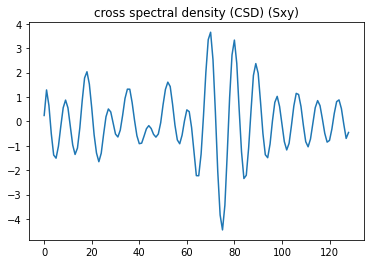

In [77]:
fxy,sxy=csd(input_sound,out_response)
plot(sxy,'cross spectral density (CSD) (Sxy)')

/Users/tracychen/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


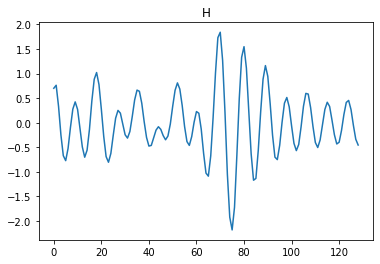

In [78]:
H=sxy/sxx
plot(H,'H')

/Users/tracychen/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


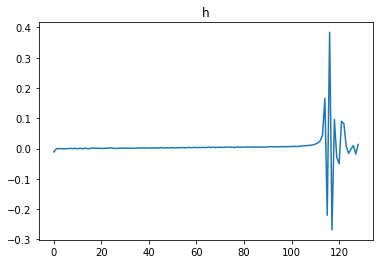

In [79]:
h=np.fft.ifft(H)
plot(h,'h')